# threads and kernels

A kernel is a function which is executed in parallel. Therefore, the main process of a kernel is to create a mapping of chunks (or single elements) of the input to single threads that each execute the function on their part. The desired result should automatically flow from the partiels execution. 

In a typical example, given some input arrays x and y of size N,  
We launch some number of threads, each having a unique global id made of block IDx and thread idx (in the block), starting from 0 going to num blocks * block dim. 
A simple implementation is to pass to threads with global id 0 through n, the data in array index équivalant to their global id. 
Kernel launch syntax:  
`Kernel name <<<kernel launch param, parameter>>>(args)`
The kernel launch parameters are usually the grid parameters. 

```/**
 * @brief CUDA kernel to compute the element-wise sum of two vectors.
 *
 * This kernel function performs the pair-wise addition of elements from
 * vectors A and B, and stores the result in vector C.
 *
 * @param A Pointer to the first input vector (array) in device memory.
 * @param B Pointer to the second input vector (array) in device memory.
 * @param C Pointer to the output vector (array) in device memory.
 * @param n The number of elements in the vectors.
 */
__global__
void vecAddKernel(float* A, float* B, float* C, int n) {
    // Calculate the unique index for the thread
    int i = threadIdx.x + blockDim.x * blockIdx.x;

    // Check if the index is within the bounds of the arrays
    if (i < n) {
        // Perform the element-wise addition
        C[i] = A[i] + B[i];
    }
}```

**multi dimesnional kernels**:  
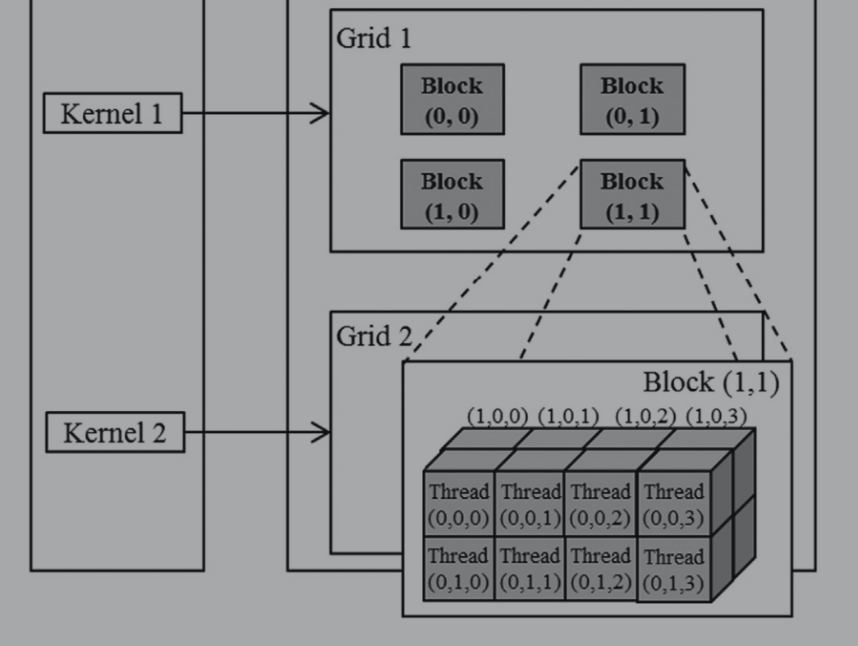


grid: organise the threads into distinct blocks. all threads within a block can share (access) same memory. 
grids and blocks are organised into 3 level hirearchy:
  ```
  dim3 grid(32, 1, 1);
  dim3 block(128, 1, 1);
  kernelFunction<<<grid, block>>>(..);
  ```
leaving a dim as 1 collapses it

## Multi-Dimensional Thread Grids
Linearization: Multi-dimensional thread grids are linearized for execution.

Thread Index Order: threadIdx.x is the fastest moving dimension, followed by threadIdx.y, and then threadIdx.z.

// CUDA kernel to perform a simple box blur on an input image
__global__
void blurKernel(unsigned char *in, unsigned char *out, int w, int h) {
    // Calculate the column and row index of the pixel this thread is processing
    int col = blockIdx.x * blockDim.x + threadIdx.x;
    int row = blockIdx.y * blockDim.y + threadIdx.y;

    // Ensure the thread is within the image bounds
    if (col < w && row < h) {
        int pixVal = 0; // Variable to accumulate the sum of pixel values
        int pixels = 0; // Variable to count the number of valid pixels in the blur region

        // Loop over the surrounding pixels within the blur region
        for (int blurRow = -BLUR_SIZE; blurRow <= BLUR_SIZE; ++blurRow) {
            for (int blurCol = -BLUR_SIZE; blurCol <= BLUR_SIZE; ++blurCol) {
                int curRow = row + blurRow; // Current row index in the blur region
                int curCol = col + blurCol; // Current column index in the blur region

                // Check if the current pixel is within the image bounds
                if (curRow >= 0 && curRow < h && curCol >= 0 && curCol < w) {
                    pixVal += in[curRow * w + curCol]; // Accumulate the pixel value
                    ++pixels; // Increment the count of valid pixels
                }
            }
        }

        // Calculate the average pixel value and store it in the output image
        out[row * w + col] = (unsigned char)(pixVal / pixels);
    }
}